<a href="https://colab.research.google.com/github/SNJ292/snj292.github.io/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#14 lines of code
from bs4 import BeautifulSoup
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import math


years = list(range(2012, 2022))
url_start = "https://www.basketball-reference.com/draft/NBA_{}.html"

# We're using the url to populate our file 'draft' with drafts between 2012-2022
for year in years:
  url = url_start.format(year)
  data = requests.get(url)

  with open("draft/{}.html".format(year), "w+")as f:
    f.write(data.text)

In [ ]:
#11 lines of code
dfs = []
for year in years:
  #dfs  will hold a list of the dataframes of each draft 
  with open("draft/{}.html".format(year)) as f:
    page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    draft_table = soup.find(id="stats")
    draft = pd.read_html(str(draft_table))[0]
    draft.head()
    dfs.append(draft)
dfs

[    Rk  Pk   Tm                  Player   College  Yrs    G     MP    PTS  \
 0    1   1  NOH           Anthony Davis  Kentucky   11  628  21623  15065   
 1    2   2  CHA  Michael Kidd-Gilchrist  Kentucky    8  446  10978   3750   
 2    3   3  WAS            Bradley Beal   Florida   11  663  23049  14643   
 3    4   4  CLE            Dion Waiters  Syracuse    8  419  11835   5505   
 4    5   5  SAC         Thomas Robinson    Kansas    5  313   4204   1528   
 ..  ..  ..  ...                     ...       ...  ...  ...    ...    ...   
 57  56  56  TOR         Tomislav Zubčić       NaN  NaN  NaN    NaN    NaN   
 58  57  57  NJN           İlkan Karaman       NaN  NaN  NaN    NaN    NaN   
 59  58  58  MIN           Robbie Hummel    Purdue    2   98   1397    379   
 60  59  59  SAS           Marcus Denmon  Missouri  NaN  NaN    NaN    NaN   
 61  60  60  LAL            Robert Sacre   Gonzaga    4  189   2745    787   
 
      TRB  ...   3P%   FT%  MP.1 PTS.1 TRB.1 AST.1    WS WS/48

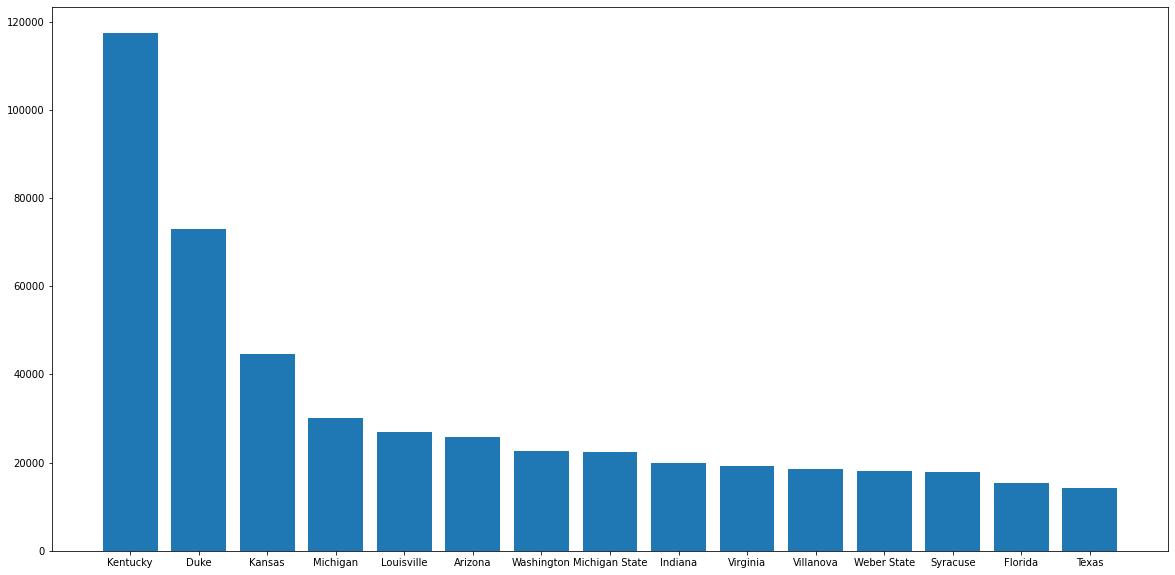

In [ ]:
#What college produces the most point scoring players historically (22). 

college_points = {}

#Iterates through the draft and looks at each player 
for draft in dfs:
  for player in draft.iterrows():
   
    #Finds the college the player used to play for and the total career points that player has made
    if(player[1]["PTS"] != "Totals" and player[1]["PTS"] != "PTS"):
      college = player[1]["College"]
      points = player[1]["PTS"]
      
      #Maps the points to the designated college
      if(college != "NaN"):
        if(college_points.__contains__(college) == True):
          college_points[college] = college_points[college] + float(points)

        elif(college_points.__contains__(college) == False):
          college_points[college] = float(points)

#Removes any empty colleges that don't have any points
items = list(college_points.items())
while len(items) > 0:
  key, val = items.pop()
  if np.isnan(val):
    college_points.pop(key)

#Sorts the dictionary and plots it onto a bar graph
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sorted_cp = sorted(college_points.items(), key=lambda x: x[1], reverse = True)[:15]
plt.bar(range(len(sorted_cp)), [value for key, value in sorted_cp])
plt.xticks(range(len(sorted_cp)), [key for key, value in sorted_cp])
plt.show()



In [ ]:
# Scatter plot of Which pick produces the most points
# Which pick has the highest win share
# Which college has players with the highest win share
# Which college has the best shooters
# Average length of the NBA career based on what college they went to; basically saying what nba player produces

pick = 0
points = 0
for draft in dfs:
  for player in draft.iterrows():
    if(not math.isnan(pick) or not math.isnan(points)):
      pick = int(player[1][1])
      points = int(player[1][8])
    #print(player)

  plt.plot(pick, points)
  plt.legend(loc="upper left")
  fig.set_size_inches(12, 10)


ValueError: ignored

In [ ]:
fig, ax = plt.subplots()
plt.grid()
plt.plot(seasons,threePA, marker='o', color = 'black', markerfacecolor='red', label = "NBA")
plt.plot(seasons, curry3PA, marker='o', color = 'blue', markerfacecolor='yellow', label = "Curry")
plt.legend(loc="upper left")
fig.set_size_inches(12, 10)
plt.title("Curry 3PA and League 3PA over the Seasons")
plt.xlabel("Seasons")
plt.ylabel("3 Point Attempts")
for index in range(len(seasons)):
  ax.text(seasons[index], threePA[index], threePA[index], size=12)
  ax.text(seasons[index], curry3PA[index], curry3PA[index], size=12)

plt.show()

In [ ]:
letters = list(string.ascii_lowercase)
url_player = "https://www.basketball-reference.com/players/{}/.html"

for name in letters:
  url_names = url_start.format(name)
  data = requests.get(url_names)

  with open("player_names/{}.html".format(name), "w+")as f:
    f.write(data.text)

In [ ]:
dfs_player = []
for name in letters:
  #dfs  will hold a list of the dataframes of each draft 
  with open("player_names/{}.html".format(name)) as f:
    page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    #
    soup.find('tr=h', class_="Player").decompose()
    player_table = soup.find(id="stats")
    players = pd.read_html(str(player_table))[0]
    players.head()

    dfs.append(players)
dfs

ValueError: ignored